In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

testfile = 'Resources/disasters.csv'
df = pd.read_csv(testfile)
df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
0,Earthquake,Ground movement,Natural,Geophysical,NaN,NaN,Japan,"Nanao, Wajima districts (Isikawa province), Ni...",37.336,136.588,2007-03-25,2007-03-25,1.0,NaN,NaN,250000.0,81.101659
1,Storm,Tropical cyclone,Natural,Meteorological,Indhala,NaN,Madagascar,"Diana, Sava, Sofia, Analanjirofo provinces",-14.840,49.940,2007-03-15,2007-03-17,80.0,203182.0,NaN,240000.0,81.101659
2,Flood,Flash flood,Natural,Hydrological,NaN,Storms and heavy rains,Australia,"Gosford, Dungog, Newcastle, Wyong, Port Stephe...",-32.870,151.380,2007-06-08,2007-06-12,9.0,5000.0,NaN,1300000.0,81.101659
3,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Haiti,"Ferrier village (Fort Liberte district, Nord E...",19.410,-71.780,2007-03-26,2007-03-30,14.0,15000.0,NaN,NaN,81.101659
4,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Argentina,"Tucuman, Santiago del Estero, Salta, Formosa p...",NaN,NaN,2007-01-18,2007-03-20,5.0,60000.0,NaN,30000.0,81.101659


In [2]:
df['Disaster Subtype'].value_counts()

Riverine flood                      1229
Tropical cyclone                     783
Convective storm                     527
Flash flood                          374
Ground movement                      331
Landslide                            203
Drought                              160
Cold wave                            144
Extra-tropical storm                  84
Heat wave                             83
Forest fire                           79
Ash fall                              48
Severe winter conditions              46
Land fire (Brush, Bush, Pasture)      31
Avalanche                             29
Coastal flood                         18
Mudslide                              17
Tsunami                               14
Rockfall                               6
Lava flow                              5
Pyroclastic flow                       1
Name: Disaster Subtype, dtype: int64

In [3]:
# Find Disaster subtype for USA
usa_df = df.loc[(df['Country'] == 'United States of America (the)'),:]
usa_df['Disaster Subtype'].value_counts()

Convective storm                    156
Tropical cyclone                     37
Riverine flood                       34
Forest fire                          19
Flash flood                           8
Drought                               8
Land fire (Brush, Bush, Pasture)      7
Ground movement                       5
Severe winter conditions              2
Cold wave                             2
Heat wave                             2
Extra-tropical storm                  1
Landslide                             1
Lava flow                             1
Mudslide                              1
Name: Disaster Subtype, dtype: int64

In [4]:
# Flood DataFrame
flood_df = usa_df.loc[(df['Disaster Subtype'] == 'Flash flood'),:]
flood_df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
700,Flood,Flash flood,Natural,Hydrological,NaN,Brief torrential rain,United States of America (the),New York province,42.2300,-74.95,2007-06-19,2007-06-20,4.0,120.0,NaN,NaN,81.101659
3202,Flood,Flash flood,Natural,Hydrological,NaN,"Heavy rains, strong storm system",United States of America (the),"Orange, Mariposa, Tuolumne, Los Angeles, San F...",NaN,NaN,2014-12-02,2014-12-05,NaN,NaN,NaN,90000.0,92.598981
3291,Flood,Flash flood,Natural,Hydrological,NaN,Heavy rain,United States of America (the),"Texas, Oklahoma, Colorado, Arkansas, Kansas, L...",34.1936,-97.99,2015-05-23,2015-05-30,32.0,12000.0,NaN,2700000.0,92.708822
3342,Flood,Flash flood,Natural,Hydrological,NaN,Torrential rains,United States of America (the),"San Marcos area (Hays district, Texas province...",NaN,NaN,2015-05-24,2015-05-24,16.0,12000.0,NaN,NaN,92.708822
3343,Flood,Flash flood,Natural,Hydrological,NaN,Torrentila rains,United States of America (the),"Hildale town (Washington district, Utah provin...",NaN,NaN,2015-09-14,2015-09-14,19.0,NaN,NaN,2000.0,92.708822


In [5]:
# Finding the top deadliest Flood in US (timeframe)
flood_df.sort_values(by=['Total Deaths'], ascending=False).head(1)

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
3291,Flood,Flash flood,Natural,Hydrological,NaN,Heavy rain,United States of America (the),"Texas, Oklahoma, Colorado, Arkansas, Kansas, L...",34.1936,-97.99,2015-05-23,2015-05-30,32.0,12000.0,NaN,2700000.0,92.708822


In [6]:
# Wildfire Dataframe
wildfire_df = usa_df.loc[(df['Disaster Subtype'] == 'Forest fire'),:]
wildfire_df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
750,Wildfire,Forest fire,Natural,Climatological,NaN,NaN,United States of America (the),"Alpine, Amador, Calaveras, El Dorado, Mono, Pl...",NaN,NaN,2007-06-24,2007-07-02,NaN,NaN,NaN,NaN,81.101659
751,Wildfire,Forest fire,Natural,Climatological,NaN,NaN,United States of America (the),"Malibu area (Los Angeles district, California ...",NaN,NaN,2007-11-24,2007-11-27,NaN,10000.0,NaN,315000.0,81.101659
846,Wildfire,Forest fire,Natural,Climatological,NaN,"Lightening, drought, wind",United States of America (the),California province,NaN,NaN,2008-06-20,2008-07-09,1.0,NaN,NaN,102000.0,84.215229
1639,Wildfire,Forest fire,Natural,Climatological,NaN,"Drought, high temperatures and strong winds",United States of America (the),Bastrop district (Texas province),NaN,NaN,2011-09-04,2011-09-09,4.0,NaN,NaN,1000000.0,87.984603
2209,Wildfire,Forest fire,Natural,Climatological,NaN,Drought conditions and strong winds,United States of America (the),"Arizona, Minnesota, Texas, Florida provinces",NaN,NaN,2011-05-29,2011-06-23,2.0,NaN,NaN,200000.0,87.984603


In [7]:
# Finding the deadliest wildfire in US (timeframe)
wildfire_df.sort_values(by=['Total Deaths'], ascending=False).head(1)

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
4396,Wildfire,Forest fire,Natural,Climatological,Camp Fire,NaN,United States of America (the),Butte county (North California),NaN,NaN,2018-11-08,2018-11-16,88.0,250000.0,NaN,16500000.0,98.219991


In [8]:
# Hurricane DataFrame
tropical_cyclone_df = usa_df.loc[(df['Disaster Subtype'] == 'Tropical cyclone'),:]
tropical_cyclone_df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
712,Storm,Tropical cyclone,Natural,Meteorological,Erin,NaN,United States of America (the),"Texas, Oklahoma, Missouri provinces",NaN,NaN,2007-08-16,2007-08-19,7.0,NaN,NaN,NaN,81.101659
775,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Dolly,NaN,United States of America (the),"Panama city beach (Bay district, Florida provi...",NaN,NaN,2008-07-23,2008-07-23,NaN,NaN,NaN,1200000.0,84.215229
795,Storm,Tropical cyclone,Natural,Meteorological,"Tropical Storm ""Fay""",NaN,United States of America (the),"Florida, Georgia, Alabama, Mississippi provinces",NaN,NaN,2008-08-20,2008-08-28,12.0,400.0,NaN,180000.0,84.215229
796,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Ike,NaN,United States of America (the),"Galveston, Brazoria, Harris, Chambers, Jeffers...",35.05,-90.45,2008-09-12,2008-09-16,82.0,200000.0,NaN,30000000.0,84.215229
844,Storm,Tropical cyclone,Natural,Meteorological,"Hurricane ""Gustav""",NaN,United States of America (the),"Louisiana, Mississippi, Texas, Alabama provinces",NaN,NaN,2008-09-01,2008-09-01,43.0,2100000.0,NaN,7000000.0,84.215229


In [9]:
# Finding the top deadliest Hurricanes in US (timeframe)
tropical_cyclone_df.sort_values(by=['Total Deaths'], ascending=False).head(1)

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
4306,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Harvey,NaN,United States of America (the),"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,NaN,2017-08-25,2017-08-29,88.0,555000.0,NaN,95000000.0,95.878166


In [10]:
# Create initial variables for tropical, wildfire, and flood dataframes
topcyclone = tropical_cyclone_df.loc[(tropical_cyclone_df["Total Deaths"] == tropical_cyclone_df["Total Deaths"].max()),:]
topwildfire = wildfire_df.loc[(wildfire_df["Total Deaths"] == wildfire_df["Total Deaths"].max()),:]
topflood = flood_df.loc[(flood_df["Total Deaths"] == flood_df["Total Deaths"].max()),:]

frames = [topcyclone,topwildfire,topflood]
top_disasters = pd.concat(frames)
top_disasters

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
4306,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Harvey,NaN,United States of America (the),"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,NaN,2017-08-25,2017-08-29,88.0,555000.0,NaN,95000000.0,95.878166
4396,Wildfire,Forest fire,Natural,Climatological,Camp Fire,NaN,United States of America (the),Butte county (North California),NaN,NaN,2018-11-08,2018-11-16,88.0,250000.0,NaN,16500000.0,98.219991
3291,Flood,Flash flood,Natural,Hydrological,NaN,Heavy rain,United States of America (the),"Texas, Oklahoma, Colorado, Arkansas, Kansas, L...",34.1936,-97.99,2015-05-23,2015-05-30,32.0,12000.0,NaN,2700000.0,92.708822


In [11]:
top_disasters["start_date"] = top_disasters["start_date"].astype("datetime64")
top_disasters["end_date"] = top_disasters["end_date"].astype("datetime64")

In [12]:
startdate = (top_disasters["start_date"] - pd.to_timedelta(14,unit = "d")).reset_index(drop = True)
enddate = (top_disasters["end_date"] + pd.to_timedelta(14,unit = "d")).reset_index(drop = True)
print(startdate,enddate)

0   2017-08-11
1   2018-10-25
2   2015-05-09
Name: start_date, dtype: datetime64[ns] 0   2017-09-12
1   2018-11-30
2   2015-06-13
Name: end_date, dtype: datetime64[ns]


In [13]:
# Read NA_sample file
samplefile = 'Resources/NA_sample_020.csv'
df2 = pd.read_csv(samplefile)
df2.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness
0,8037902,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive
1,8790126,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive
2,11647260,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive
3,11810796,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive
4,13183104,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive


In [14]:
df2["created_at"] = df2["created_at"].astype("datetime64")

In [15]:
# Find tweets 2 weeks before and after the major disasters happening
df2['date'] = df2['created_at'].dt.date
df2.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
0,8037902,2018-01-31 20:40:44,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01-31
1,8790126,2018-03-15 21:28:05,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03-15
2,11647260,2018-09-29 14:42:56,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09-29
3,11810796,2018-10-08 22:23:50,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10-08
4,13183104,2018-12-16 11:52:40,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12-16


In [105]:
df2["date"] = df2["date"].astype("datetime64[ns]")
df2["date"].dt.normalize()
df2.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
0,8037902,2018-01-31 20:40:44,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01-31
1,8790126,2018-03-15 21:28:05,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03-15
2,11647260,2018-09-29 14:42:56,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09-29
3,11810796,2018-10-08 22:23:50,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10-08
4,13183104,2018-12-16 11:52:40,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12-16


In [106]:
# Create variables for start and end times for tweets
cyclone_tweets = df2.loc[(df2["date"] >= startdate[0]) & (df2["date"] <= enddate[0]), :]
wildfire_tweets = df2.loc[(df2["date"] >= startdate[1]) & (df2["date"] <= enddate[1]), :]
flood_tweets = df2.loc[(df2["date"] >= startdate[2]) & (df2["date"] <= enddate[2]), :]

In [107]:
# Finding hurricane tweets 2 weeks before/after top hurricane event
print(startdate[0],enddate[0])
cyclone_tweets.head()

2017-08-11 00:00:00 2017-09-12 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
216,4992854,2017-08-15 17:30:04,38.419250,-82.445154,-0.465921,Global stance,believer,male,not aggressive,2017-08-15
360,5026051,2017-09-10 22:11:53,36.030113,-114.982619,-0.534735,Donald Trump versus Science,believer,male,aggressive,2017-09-10
640,5028248,2017-09-11 02:43:21,29.285810,-81.055890,-0.524462,Global stance,believer,male,not aggressive,2017-09-11
1072,5028195,2017-09-11 02:35:47,43.038900,-87.906470,-0.589799,Ideological Positions on Global Warming,believer,male,aggressive,2017-09-11
1219,5039910,2017-09-12 03:08:16,45.713952,-122.706927,-0.535728,Politics,believer,female,not aggressive,2017-09-12


In [108]:
# Finding wildfire tweets 2 weeks before/after top wildfire event
print(startdate[1],enddate[1])
wildfire_tweets.head()

2018-10-25 00:00:00 2018-11-30 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
108,12184635,2018-11-26 16:55:15,44.108850,-79.122677,-0.028878,Global stance,neutral,male,aggressive,2018-11-26
158,12380621,2018-11-28 16:04:45,34.053691,-118.242766,-0.593402,Global stance,believer,female,not aggressive,2018-11-28
290,12478425,2018-11-30 03:55:32,30.271129,-97.743700,-0.638252,Importance of Human Intervantion,believer,male,not aggressive,2018-11-30
292,12505618,2018-11-30 14:53:32,40.723710,-73.704850,0.715171,Weather Extremes,neutral,female,not aggressive,2018-11-30
320,12447850,2018-11-29 17:19:54,34.052230,-118.243680,0.002881,Donald Trump versus Science,denier,male,not aggressive,2018-11-29


In [109]:
# Finding flood tweets 2 weeks before/after top flood event
print(startdate[2],enddate[2])
flood_tweets.head()

2015-05-09 00:00:00 2015-06-13 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
101,2590945,2015-05-28 20:48:13,28.750540,-82.500100,0.155581,Politics,neutral,male,not aggressive,2015-05-28
270,2673100,2015-06-12 04:48:15,42.527412,-92.445318,0.494693,Weather Extremes,believer,male,not aggressive,2015-06-12
308,2590530,2015-05-28 19:45:17,38.895037,-77.036543,-0.523694,Weather Extremes,neutral,female,aggressive,2015-05-28
589,2667006,2015-06-11 02:05:12,53.550140,-113.468710,0.459667,Global stance,believer,female,not aggressive,2015-06-11
608,2584784,2015-05-28 07:28:08,35.084103,-106.650985,-0.514281,Politics,neutral,male,not aggressive,2015-05-28


In [110]:
# cyclone tweets Weather Extreme topic data
print(startdate[0],enddate[0])
cyclone_we = cyclone_tweets.loc[cyclone_tweets['topic'] == "Weather Extremes"]
cyclone_we.head()

2017-08-11 00:00:00 2017-09-12 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
2459,4995252,2017-08-17 20:10:01,39.290882,-76.610759,0.512937,Weather Extremes,neutral,undefined,not aggressive,2017-08-17
2882,4994199,2017-08-16 03:17:02,40.348720,-74.659050,-0.144761,Weather Extremes,believer,female,not aggressive,2017-08-16
3059,5004533,2017-08-28 06:30:21,41.921673,-93.312270,0.402846,Weather Extremes,neutral,undefined,not aggressive,2017-08-28
4890,4997020,2017-08-21 04:22:17,28.542111,-81.379030,-0.317874,Weather Extremes,neutral,male,not aggressive,2017-08-21
6053,5000311,2017-08-25 03:33:48,41.262128,-95.861391,-0.092279,Weather Extremes,denier,male,aggressive,2017-08-25


In [111]:
cyclone_we.dtypes

Unnamed: 0                 int64
created_at        datetime64[ns]
lat                      float64
lng                      float64
sentiment                float64
topic                     object
stance                    object
gender                    object
aggressiveness            object
date              datetime64[ns]
dtype: object

In [112]:
# Counting weather event topic tweets 
cyclone_we.value_counts()

Unnamed: 0  created_at           lat        lng          sentiment  topic             stance    gender     aggressiveness  date      
4987354     2017-08-11 12:21:33  42.360253  -71.058291   -0.355442  Weather Extremes  believer  male       not aggressive  2017-08-11    1
5007621     2017-08-29 18:50:32  41.650020  -72.734216   -0.595389  Weather Extremes  believer  female     not aggressive  2017-08-29    1
5007397     2017-08-29 16:48:52  37.774930  -122.419420   0.449808  Weather Extremes  believer  male       not aggressive  2017-08-29    1
5007399     2017-08-29 16:51:28  40.050650  -77.520260    0.518031  Weather Extremes  neutral   male       aggressive      2017-08-29    1
5007465     2017-08-29 17:29:01  33.749000  -84.387980    0.014914  Weather Extremes  believer  male       aggressive      2017-08-29    1
                                                                                                                                        ..
4999971     2017-08-24 17:47:05 

In [113]:
top_disasters

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
4306,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Harvey,NaN,United States of America (the),"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,NaN,2017-08-25,2017-08-29,88.0,555000.0,NaN,95000000.0,95.878166
4396,Wildfire,Forest fire,Natural,Climatological,Camp Fire,NaN,United States of America (the),Butte county (North California),NaN,NaN,2018-11-08,2018-11-16,88.0,250000.0,NaN,16500000.0,98.219991
3291,Flood,Flash flood,Natural,Hydrological,NaN,Heavy rain,United States of America (the),"Texas, Oklahoma, Colorado, Arkansas, Kansas, L...",34.1936,-97.99,2015-05-23,2015-05-30,32.0,12000.0,NaN,2700000.0,92.708822


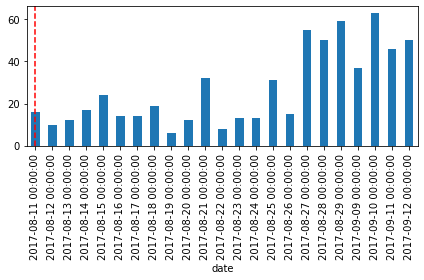

In [114]:
new_df = cyclone_we.groupby("date").count()
new_df0 = new_df.loc[:,"sentiment"]
#new_df1 = new_df0.set_index("date")
axes = new_df0.plot(kind="bar")
axes.axvline(("2017-08-25"), color='r', linestyle='--', label = "Harvey Start Date")
#plt.axvline(pd.to_datetime("2017-08-29"), color='g', linestyle='--', label = "Harvey End Date")
plt.tight_layout()